# Week 9 - Gradient Boost

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load and clean data
df = pd.read_csv("austinHousingData.csv")
df = df.select_dtypes(include=[np.number]).dropna()

# Set target and features
y = df['latestPrice']  # Replace with actual target if different
X = df.drop(['latestPrice', 'zpid'], axis=1, errors='ignore')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model setup
model = GradientBoostingRegressor(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

# Train and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))


RMSE: 310340.15604619484
R² score: 0.5930651800573159


The Gradient Boosting model achieved an RMSE of approximately $310,340, meaning its home price predictions deviate from the actual values by an average of around $310K. This is a substantial margin and suggests the model makes large errors for some properties, potentially due to outliers or missing explanatory features. The R² score of 0.59 indicates that the model explains about 59% of the variance in housing prices—capturing more than half of the pricing patterns but leaving a significant portion unexplained. This level of performance is reasonable for a real-world housing dataset, which can be influenced by many complex, unobserved factors such as location desirability, renovations, or market trends. To improve accuracy, further tuning, better feature engineering, and the use of more advanced models like XGBoost could be explored.

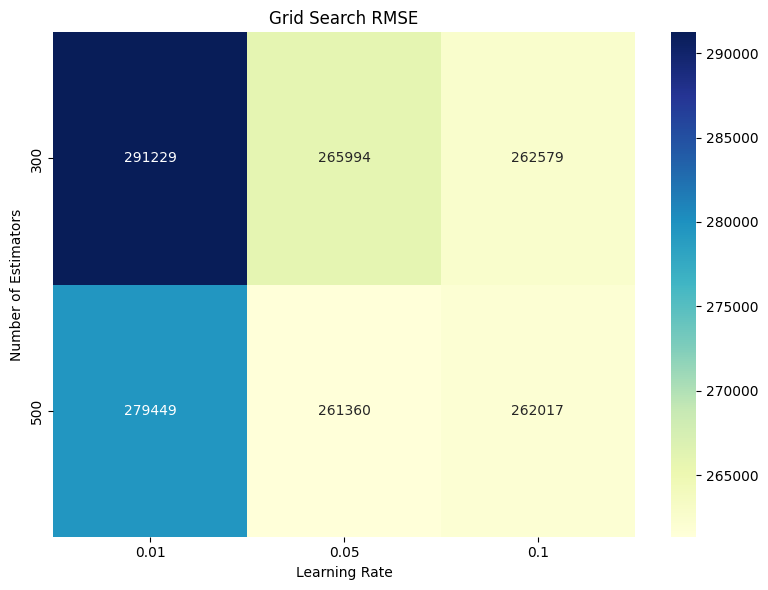

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
# Set up the parameter grid
param_grid = {
    'learning_rate': [0.01,0.05,0.1],
    'n_estimators': [300,500],
    'max_depth': [3]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    GradientBoostingRegressor(subsample=0.8, random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Convert GridSearch results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Create pivot table of RMSE values
pivot_table = results.pivot_table(
    index='param_n_estimators',
    columns='param_learning_rate',
    values='mean_test_score'
)
rmse_table = (-pivot_table) ** 0.5  # Convert negative MSE to RMSE

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rmse_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Grid Search RMSE")
plt.xlabel("Learning Rate")
plt.ylabel("Number of Estimators")
plt.tight_layout()
plt.show()

The heatmap illustrates how the model’s performance varies across different combinations of learning rate and number of estimators, measured by RMSE (Root Mean Squared Error). Lower RMSE values indicate better predictive accuracy. The best result—an RMSE of approximately 261,360—is achieved with a learning rate of 0.05 and 500 estimators. This suggests that a moderate learning rate allows the model to learn effectively without overfitting or requiring excessive trees. In contrast, a low learning rate of 0.01 performs poorly, even with more trees, likely because the model learns too slowly to capture meaningful patterns. Increasing the number of estimators from 300 to 500 consistently improves performance, but with diminishing returns. Overall, the heatmap highlights that a balanced learning rate and sufficient tree depth are key to optimizing Gradient Boosting model performance.